<br>
<center>

# Assignments for Week 4

</center>

<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
DSC 550 <br>
4/4/2024  

</div>


## Libraries

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

## Part 1: Load the data as a Pandas data frame and ensure that it imported correctly.
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [5]:
path = r'C:\Users\Owner\OneDrive\Desktop\DataScience\2024_Spring_DataMining\auto-mpg.csv'
data = pd.read_csv(path)

print(type(data)) # Data type
print()
print(data.head()) # Data check

<class 'pandas.core.frame.DataFrame'>

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


## Part 2: Begin by prepping the data for modeling:
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

   - ### Remove the car name column.


In [ ]:
data.drop(columns=['car name'], inplace=True)

In [10]:
print(data.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')


   - ### The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.

In [11]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce') # coerce Will put nan for nonnumeric values

In [12]:
mean_horsepower = data['horsepower'].mean() # Scalar value
print(mean_horsepower)

104.46938775510205


In [13]:
data['horsepower'].fillna(mean_horsepower, inplace=True) # Fill nan with Scalar value

In [15]:
mean_occurrences = (data['horsepower'] == mean_horsepower).sum()
print(f'{mean_occurrences} string vlaues were inserted into the dataframe.') # check how many were filled by scalar

6 string vlaues were inserted into the dataframe.


   - ### Create dummy variables for the origin column.

In [16]:
origin_dummies = pd.get_dummies(data['origin'], prefix='origin') # Will create boolean column
data = pd.concat([data, origin_dummies], axis=1) # Concatenate to original dataframe
data.drop(columns=['origin'], inplace=True) # Remove the original column

print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_1  origin_2  origin_3  
0          70      True     False     False  
1          70      True     False     False  
2          70      True     False     False  
3          70      True     False     False  
4          70      True     False     False  


<br>

## Part 3: Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

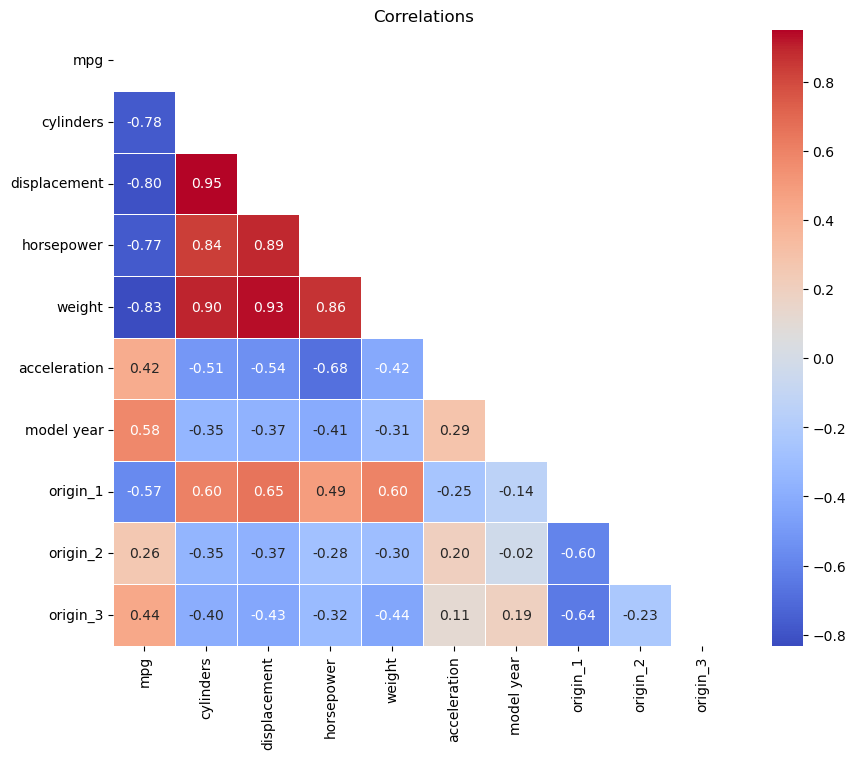

In [22]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Lower diaginal

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # put mask
plt.title("Correlations")
plt.show()

In [57]:
mpg_correlations = correlation_matrix['mpg'].drop('mpg') # dont want the ones with itself
top_3_correlations = mpg_correlations.abs().nlargest(3) # absolute value and take largest

print('Top correlated features')
print()
for feature, correlation in top_3_correlations.items(): # loop through corleations and retrieve the feature
    print(f"Correlation : {correlation:.2f} for 'mpg' and '{feature}'")


Top correlated features

Correlation : 0.83 for 'mpg' and 'weight'
Correlation : 0.80 for 'mpg' and 'displacement'
Correlation : 0.78 for 'mpg' and 'cylinders'


<br>

## Part 4: Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

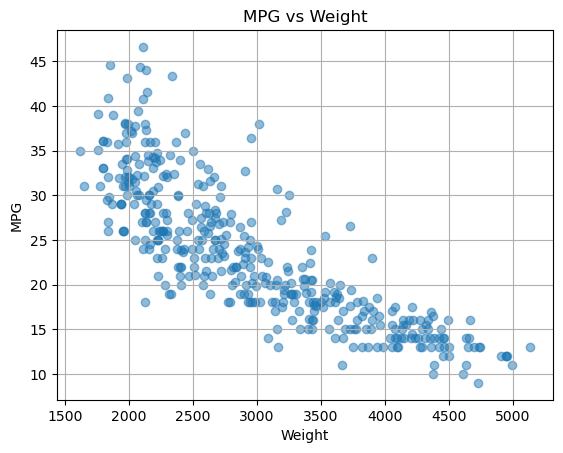

In [31]:
plt.scatter(data['weight'], data['mpg'], alpha=0.5) # Scatter plot
plt.title('MPG vs Weight') # Label
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

Upon initial inspection, the scatter plot exhibits a noticeable downward trend, indicating a fairly tight negative correlation between the variables.

<br>

## Part 5: Randomly split the data into 80% training data and 20% test data, where your target is mpg.

<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [34]:
X = data.drop(columns=['mpg']) # Features
y = data['mpg']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training data and 20% 

print("Training:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Training: (318, 9) (318,)
Test: (80, 9) (80,)


<br>

## Part 6: Train an ordinary linear regression on the training data.

<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [37]:
linear_reg = LinearRegression() # Initialize
linear_reg.fit(X_train, y_train) # Train on the training data

LinearRegression()

<br>

## Part 7: Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [49]:
y_train_pred = linear_reg.predict(X_train) # Predictions - training

y_test_pred = linear_reg.predict(X_test) # Predictions - test

r2_train = r2_score(y_train, y_train_pred) # R2 score
r2_test = r2_score(y_test, y_test_pred)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False) # RMSE
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mae_train = mean_absolute_error(y_train, y_train_pred) # MAE
mae_test = mean_absolute_error(y_test, y_test_pred)


print("Training set:")
print("R2:", r2_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print()
print('Summary')
print(f"R2: {r2_train:.2f} % of the variance in the MPG is explained by the features in the model.")
print(f"RMSE: Predictions are off by {rmse_train:.2f} units of mpg from the actual values in the training set.")
print(f"MAE: Predictions are off by approximately {mae_train:.2f} units of mpg from the actual values in the training set.")
print()
print("Test set:")
print("R2:", r2_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print()
print('Summary')
print(f"R2: {r2_test:.2f} % of the variance in the MPG is explained by the features in the model.")
print(f"RMSE: Predictions are off by {rmse_test:.2f} units of mpg from the actual values in the training set.")
print(f"MAE: Predictions are off by approximately {mae_test:.2f} units of mpg from the actual values in the training set.")


Training set:
R2: 0.8188288951042786
RMSE: 3.370273563938906
MAE: 2.605484693771036

Summary
R2: 0.82 % of the variance in the MPG is explained by the features in the model.
RMSE: Predictions are off by 3.37 units of mpg from the actual values in the training set.
MAE: Predictions are off by approximately 2.61 units of mpg from the actual values in the training set.

Test set:
R2: 0.8449006123776617
RMSE: 2.8877573478836305
MAE: 2.2875867704421053

Summary
R2: 0.84 % of the variance in the MPG is explained by the features in the model.
RMSE: Predictions are off by 2.89 units of mpg from the actual values in the training set.
MAE: Predictions are off by approximately 2.29 units of mpg from the actual values in the training set.


We have high R2 values and low RMSE and MAE values. Implies the linear regression model did well.

The majority of the variance is explained by the features in the model. Indicating good predictive outputs.

The RMSE and MAE values show the predictions were close to the actual values. Which is good for accuracy.

Finally, does well on new data. So the model is not over fit. 

<br>

## Part 8: Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [41]:
# Initialize the Random Forest Regressor model
random_forest = RandomForestRegressor(random_state=42)

# Train the Random Forest Regressor model on the training data
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
y_train_pred_rf = random_forest.predict(X_train) # Predictions - trainging

y_test_pred_rf = random_forest.predict(X_test) # Predictions - test

r2_train_rf = r2_score(y_train, y_train_pred_rf) # R2
r2_test_rf = r2_score(y_test, y_test_pred_rf)

rmse_train_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False) # RMSE
rmse_test_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)

mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf) # MAE
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)


print("Training set:")
print("R2:", r2_train_rf)
print("RMSE:", rmse_train_rf)
print("MAE:", mae_train_rf)
print()
print('Summary')
print(f"R2: {r2_train_rf:.2f} % of the variance in the MPG is explained by the features in the model.")
print(f"RMSE: Predictions are off by {rmse_train_rf:.2f} units of mpg from the actual values in the training set.")
print(f"MAE: Predictions are off by approximately {mae_train_rf:.2f} units of mpg from the actual values in the training set.")
print()
print("Test set:")
print("R2:", r2_test_rf)
print("RMSE:", rmse_test_rf)
print("MAE:", mae_test_rf)
print()
print('Summary')
print(f"R2: {r2_test_rf:.2f} % of the variance in the MPG is explained by the features in the model.")
print(f"RMSE: Predictions are off by {rmse_test_rf:.2f} units of mpg from the actual values in the training set.")
print(f"MAE: Predictions are off by approximately {mae_test_rf:.2f} units of mpg from the actual values in the training set.")


Training set:
R2: 0.980968082350782
RMSE: 1.0923503754598596
MAE: 0.7464874213836477

Summary
R2: 0.98 % of the variance in the MPG is explained by the features in the model.
RMSE: Predictions are off by 1.09 units of mpg from the actual values in the training set.
MAE: Predictions are off by approximately 0.75 units of mpg from the actual values in the training set.

Test set:
R2: 0.9153585002076691
RMSE: 2.1332773934723064
MAE: 1.5889125000000002

Summary
R2: 0.92 % of the variance in the MPG is explained by the features in the model.
RMSE: Predictions are off by 2.13 units of mpg from the actual values in the training set.
MAE: Predictions are off by approximately 1.59 units of mpg from the actual values in the training set.


We have even higher R2 values and even lower RMSE and MAE values. Implies the Forest regression model did well.

The majority of the variance is explained by the features in the model. Indicating good predictive outputs.

The RMSE and MAE values show the predictions were close to the actual values. Which is good for accuracy.

Finally, The model does experiance a drop in R2 on new data. So the model may have some overfitting.